# Epistemic loss as a function of training epoch

In [2]:
from scripts import train, models, analysis, io
import torch
import matplotlib.pyplot as plt

First initialize the model.

In [5]:
DER_type = 'SDER'
#model_name = 
def get_best_device(fallback="cpu"):
    return torch.device("cuda:0" if torch.cuda.is_available() else fallback)
DEVICE = get_best_device()
model, _ = train.model_setup_DER(DER_type, DEVICE)

In [6]:
def load_model_checkpoint(model, DER_type, epoch, device, path='../models'):
    """
    Load PyTorch model checkpoint from a .pt file.

    :param path: Location to load the model from
    :param DER_type: Type of your model
    :param epoch: Epoch to load
    :param device: Device to load the model onto ('cuda' or 'cpu')
    :param model: PyTorch model to load the checkpoint into
    :return: Loaded model
    """
    file_name = f"{path}/{DER_type}_{epoch}.pt"
    
    checkpoint = torch.load(file_name, map_location=device)
    
    # Handle the case where extra information is present in the state_dict
    if 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)

    # Extract additional information
    loaded_epoch = checkpoint.get('epoch', None)
    med_u_ep_validation = checkpoint.get('med_u_ep_validation', None)
    med_u_al_validation = checkpoint.get('med_u_al_validation', None)

    return model, loaded_epoch, med_u_ep_validation, med_u_al_validation

In [7]:
loadmodel, epoch, ep, al = load_model_checkpoint(model, DER_type, 1, DEVICE)

In [8]:
print(loadmodel, epoch, ep)

Sequential(
  (0): Model(
    (model): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
    )
  )
  (1): SDERLayer()
) 1 41.846817


In [ ]:
# now make a loop over all epochs available for the model
import os
print(os.listdir('../models/'))

In [9]:
ep = []
al = []
n_epochs = 500
for e in range(n_epochs):
    _, _, epistemic, aleatoric = load_model_checkpoint(model, DER_type, e, DEVICE)
    ep.append(epistemic)
    al.append(aleatoric)
    

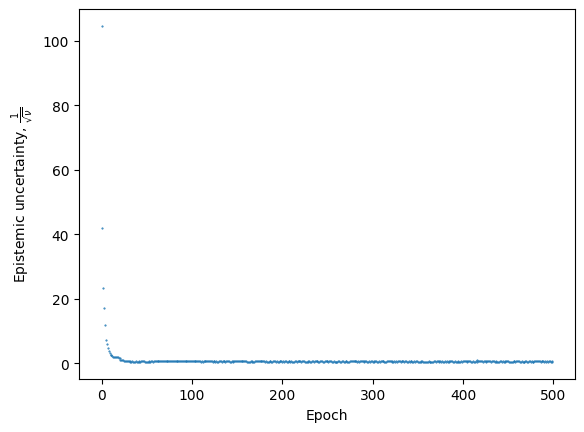

In [11]:
plt.clf()
plt.scatter(range(n_epochs), ep, s = 0.25)
plt.ylabel(r'Epistemic uncertainty, $\frac{1}{\sqrt{\nu}}$')
plt.xlabel('Epoch')
plt.show()

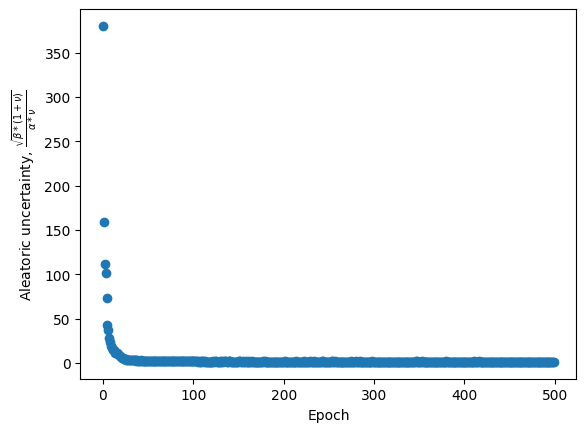

In [12]:
plt.clf()
plt.scatter(range(n_epochs), al)
plt.ylabel(r'Aleatoric uncertainty, $\frac{\sqrt{\beta * (1 + \nu)}}{\alpha * \nu}$')
plt.xlabel('Epoch')
plt.show()


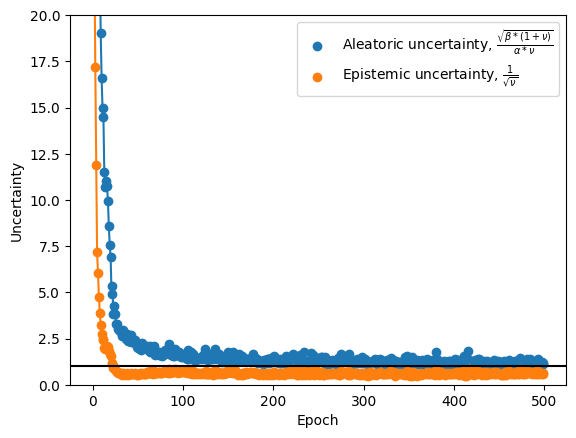

In [16]:
# overplot both
plt.clf()
plt.plot(range(n_epochs), al)
plt.plot(range(n_epochs), ep)
plt.scatter(range(n_epochs), al, label = r'Aleatoric uncertainty, $\frac{\sqrt{\beta * (1 + \nu)}}{\alpha * \nu}$')
plt.scatter(range(n_epochs), ep, label = r'Epistemic uncertainty, $\frac{1}{\sqrt{\nu}}$')
# total = sqrt(ep^2 + al^2)
plt.legend()
plt.ylabel('Uncertainty')
plt.xlabel('Epoch')
plt.ylim([0,20])
plt.axhline(y = 1.0, color = 'black')
plt.show()
